# Solving multiple linear ordinary differential equations in Sympy

Presume we wish to solve the coupled linear ordinary differential equations given by

\begin{align}
3\dot{x} &= y\\
\dot{y}&=-3y-15x+4u(t)
\end{align}
where $u(t)$ is the step function and $x(0)=5$ and $y(0) = 10$. 



In [1]:
%matplotlib inline

# import symbolic capability to Python- namespace is a better idea in a more general code. 
from sympy import *

# print things all pretty
from sympy.abc import *
init_printing()

Need to define variables as symbolic for sympy to use them. 

In [2]:
t, C1, C2= symbols("t C1 C2")
x, y =  symbols("x y", cls = Function, Function = True)

First we must define the governing equations as equalities or expressions. We have the option, I will do one each way for the sake of illustration, as opposed to simplicity. 

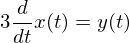

In [3]:
eq1 = Eq(3 * diff(x(t), t), y(t))
eq1

I'd like to use the Heaviside function. It doesn't work, but I'm showing how I tried anyway. 

In [4]:
import sympy.functions.special.delta_functions as sfuncs

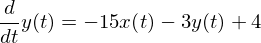

In [5]:
eq2 = Eq(diff(y(t),t), - 3 * y(t) - 15 * x(t) + 4 * sfuncs.Heaviside(t))
# Note: Heaviside doesn't work for me in the solver, so I've left it here as "proper" but dokn't use it. 
eq2 = Eq(diff(y(t),t), - 3 * y(t) - 15 * x(t) + 4 * 1)
eq2

Solving the differential equations. The `ics = `... should apply the initial conditions. Doesn't work. Perhaps some day. 

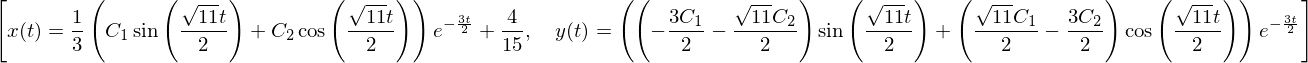

In [6]:
soln = dsolve((eq1, eq2), ics = {x: 5, y: 0})
soln

Solving for the constants. I'm substituting `t = 0`, then the initial values for `x` and `y`. You'll note that the first equation doesn't need `y(0)` substituted, while the second doesn't need `x(0)` substituted. I found this out after and did that for brevity.   

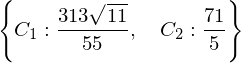

In [7]:
constants = solve((soln[0].subs(t,0).subs(x(0),5), soln[1].subs(t,0).subs(y(0),10)),{C1,C2})
constants

Let's put in our constants and see what we get. I'm using `.rhs` to pull out the right side of the solution. You can look at `soln[0]` to see what I mean, or try `help(soln[0])` and read the results.  

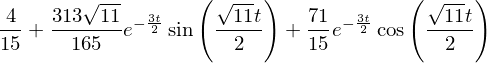

In [8]:
xsoln = expand(soln[0].rhs.subs(constants))
xsoln

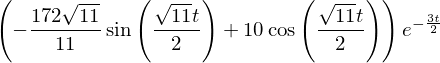

In [9]:
ysoln = soln[1].rhs.subs(constants)
ysoln

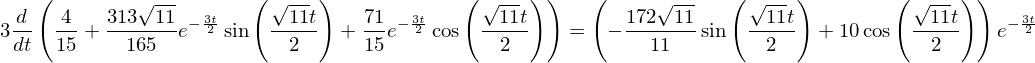

In [10]:
eq1.subs(x(t),xsoln).subs(y(t),ysoln)

Is equation 1 true with this solution set?

In [11]:
Eq(simplify(3*diff(xsoln,t)),simplify(ysoln))

Is equation 2 true with this solution set?

In [12]:
Eq(simplify(diff(ysoln,t)),simplify(4-3*ysoln-15*xsoln))

So that's it. Out answers are indeed given by

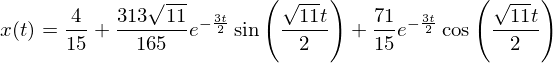

In [17]:
Eq(x(t),xsoln)

and

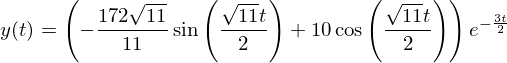

In [18]:
Eq(y(t),ysoln)